## Analysis of the topics created by the Top2Vec model

- Primitives are loaded, as well as the topic weights of the reduced top2vec model (100 topics) --> see part II in `top2vec_training.ipynb`.
- They are merged into one df.
- Topics are plotted over time in bins per year, using `agg.('mean')`.
- 



In [2]:
import ndjson
import nolds
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.ndimage import gaussian_filter1d


### Observations

- Difference between *topics with high number of documents similar to them* and *topics with high number of cosine similarity*
- What methods can we use to smoothen the signal?
    - `rolling(window).mean()` takes subsequent data points and averages them, but will give weird output when there are large time gaps between two data points.
    - `scipy.ndimage.gaussian_filter1d`, sigma = 2.

### Scaling and smoothening

- We use the original representations of the cosine similarity, ranging from -1 to +1.
- We apply the `TimeSeriesScalerMeanVariance` in `tslearn.preprocessing`.

In [3]:
year_mean_scaled = pd.read_csv('../../corpus/year_mean_scaled.csv', index_col=0)
year_mean_scaled.head()

,year,0,1,2,3,4,5,6,7,8,...,90,91,92,93,94,95,96,97,98,99
0,1450,-0.272212,1.581187,5.687352,0.470106,1.219626,0.878718,-0.359234,1.503809,2.211649,...,1.360070,0.538550,3.852131,1.723419,-2.332223,1.688561,0.957550,-0.346109,3.647183,1.105196
1,1451,-0.299907,-1.138443,-1.145044,-0.750547,-1.927901,-0.943105,-1.523076,-1.130025,-1.127321,...,-0.186829,-1.938838,-1.518069,0.062274,1.138678,-0.858984,-0.831873,-1.577613,-1.783913,-1.235959
2,1453,-1.630772,-1.292714,1.808157,3.052558,-1.600364,-1.608338,-1.433308,0.611399,1.718354,...,-0.486289,-0.409831,0.822390,1.545176,0.588994,1.384890,1.244834,-1.571017,-0.050993,-1.580335
3,1454,0.346062,0.435455,-0.188963,-0.313646,1.754227,0.215970,0.276811,0.641815,-0.066323,...,0.785294,4.545936,-0.611967,-1.099752,-1.183042,0.165667,0.843971,0.082539,-0.017649,0.562937
4,1455,-0.841500,-0.006961,-0.354175,0.427795,-0.116554,-0.879924,-0.586642,-0.101221,1.314314,...,-0.069171,2.076482,-0.092437,0.179779,-1.078278,0.474620,0.429645,-0.241994,-0.579078,-0.509721


### Smoothening with a Gaussian kernel

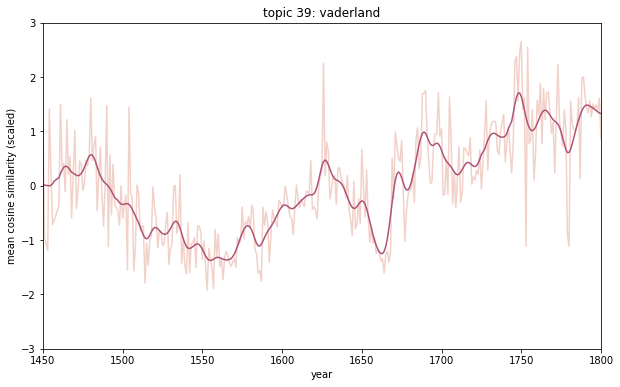

In [36]:
#fig, (axes) = plt.subplots(3, 1, figsize=(4, 12), sharey=False)

topic = [*range(0,100)]
topic = [str(x) for x in topic]

smooth = gaussian_filter1d(year_mean_scaled[topic[69]].to_numpy(), 3)
plt.figure(figsize=(10, 6))
sns.lineplot(year_mean_scaled['year'], year_mean_scaled[topic[69]], color='#F2D1C9')
sns.lineplot(year_mean_scaled['year'], smooth, color='#AE5377')
plt.title('topic 69: stadhouder, nass')
plt.xlabel('year')
plt.ylabel('mean cosine similarity (scaled)')
plt.xlim([1450, 1800])
plt.ylim([-3, +3])
plt.show()

(-3.0, 3.0)

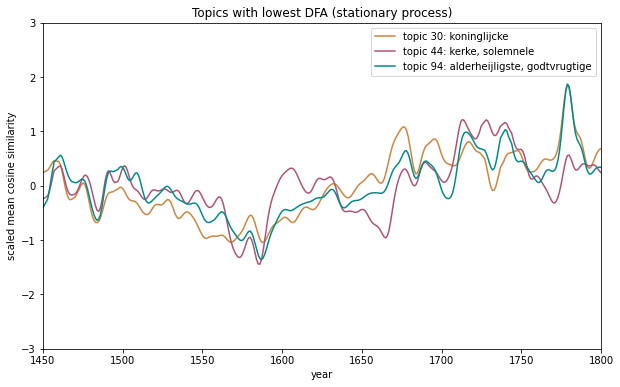

In [55]:
plt.figure(figsize=(10, 6))
smooth0 = gaussian_filter1d(year_mean_scaled[topic[30]].to_numpy(), 3)
sns.lineplot(year_mean_scaled['year'], smooth0, color='peru')
smooth1 = gaussian_filter1d(year_mean_scaled[topic[44]].to_numpy(), 3)
sns.lineplot(year_mean_scaled['year'], smooth1, color='#AE5377')
smooth2 = gaussian_filter1d(year_mean_scaled[topic[94]].to_numpy(), 3)
sns.lineplot(year_mean_scaled['year'], smooth2, color='#008B8B')
plt.title('Topics with lowest DFA (stationary process)')
plt.legend(['topic 30: koninglijcke', 'topic 44: kerke, solemnele', 'topic 94: alderheijligste, godtvrugtige'])
plt.xlabel('year')
plt.ylabel('scaled mean cosine similarity')
plt.xlim([1450, 1800])
plt.ylim([-3, +3])

(-3.0, 3.0)

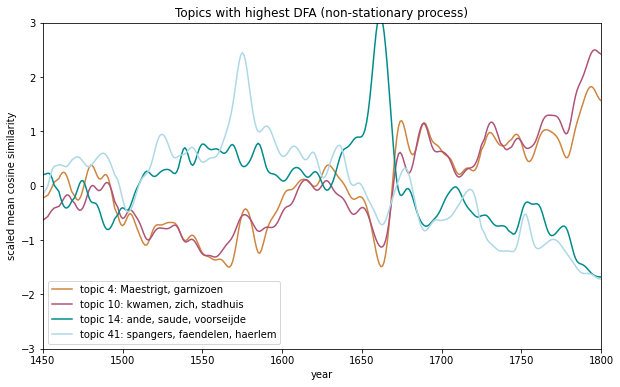

In [57]:
plt.figure(figsize=(10, 6))
smooth0 = gaussian_filter1d(year_mean_scaled[topic[4]].to_numpy(), 3)
sns.lineplot(year_mean_scaled['year'], smooth0, color='peru')
smooth1 = gaussian_filter1d(year_mean_scaled[topic[10]].to_numpy(), 3)
sns.lineplot(year_mean_scaled['year'], smooth1, color='#AE5377')
smooth2 = gaussian_filter1d(year_mean_scaled[topic[14]].to_numpy(), 3)
sns.lineplot(year_mean_scaled['year'], smooth2, color='#008B8B')
smooth3 = gaussian_filter1d(year_mean_scaled[topic[41]].to_numpy(), 3)
sns.lineplot(year_mean_scaled['year'], smooth3, color='#ADD8E6')
plt.title('Topics with highest DFA (non-stationary process)')
plt.legend(['topic 4: Maestrigt, garnizoen', 'topic 10: kwamen, zich, stadhuis', 'topic 14: ande, saude, voorseijde', 'topic 41: spangers, faendelen, haerlem'])
plt.xlabel('year')
plt.ylabel('scaled mean cosine similarity')
plt.xlim([1450, 1800])
plt.ylim([-3, +3])

## DFA (Detrended Fluctuation Analysis)

In [6]:
year_mean = pd.read_csv('../../corpus/year_mean.csv', index_col=0)
year_mean.head()

,year,0,1,2,3,4,5,6,7,8,...,90,91,92,93,94,95,96,97,98,99
0,1450,-0.017207,0.304431,0.281077,0.205256,0.235938,0.148406,0.114993,0.152635,0.351971,...,0.253335,0.255517,0.395077,0.342056,-0.036096,0.159903,0.296062,0.161600,0.341195,0.238253
1,1451,-0.019187,0.103373,0.014900,0.115983,0.011693,-0.027681,-0.000959,0.023454,0.105956,...,0.127352,0.082901,0.119461,0.192536,0.116945,0.069629,0.162961,0.083724,0.041913,0.002720
2,1453,-0.114332,0.091968,0.129951,0.394125,0.035028,-0.091979,0.007985,0.108865,0.315625,...,0.102964,0.189437,0.239581,0.326012,0.092708,0.149142,0.317431,0.084141,0.137406,-0.031927
3,1454,0.026994,0.219729,0.052147,0.147936,0.274025,0.084349,0.178361,0.110357,0.184130,...,0.206524,0.534737,0.165965,0.087942,0.014574,0.105938,0.287614,0.188706,0.139243,0.183699
4,1455,-0.057906,0.187022,0.045711,0.202162,0.140742,-0.021574,0.092337,0.073914,0.285855,...,0.136935,0.362675,0.192629,0.203113,0.019194,0.116886,0.256796,0.168184,0.108306,0.075783


In [27]:
topic = [*range(0,100)]
topic = [str(x) for x in topic]

nolds.dfa(year_mean[topic[54]])

0.865664819891275

In [40]:
dfa_list = []

for i in range(0,100):
    dfa_list.append(nolds.dfa(year_mean[topic[i]]))

In [12]:
max_value = max(dfa_list)
min_value = min(dfa_list)

max_index = dfa_list.index(max_value)
min_index = dfa_list.index(min_value)

In [14]:
max_index

4

In [53]:
[i for i,v in enumerate(dfa_list) if v < 0.73]

[30, 44, 94]

In [49]:
[i for i,v in enumerate(dfa_list) if v > 0.95]

[4, 10, 14, 41]